In [1]:
from math import sqrt

import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import skimage
from skimage import io, exposure, img_as_float, img_as_ubyte, morphology, filters, util
from skimage.color import rgb2gray, label2rgb
from skimage.feature import canny, blob_dog, blob_log, blob_doh,  peak_local_max
from skimage.filters import sobel, threshold_otsu, try_all_threshold, threshold_local, threshold_minimum
from skimage.segmentation import clear_border, watershed, random_walker
from skimage.measure import label, regionprops
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.morphology import closing

import cv2

from scipy import stats
from scipy import ndimage as ndi
from scipy.stats import norm

import os

import statistics

import plotly.graph_objs as go

import pickle
import math

import seaborn as sns
import scipy as sp

%store -r areaflatnew
%store -r circflatnew
%store -r lengthflatnew
%store -r arflatnew

%store -r area2p5new
%store -r circ2p5new
%store -r length2p5new
%store -r ar2p5new

%store -r area5new
%store -r circ5new
%store -r length5new
%store -r ar5new

%store -r area10new
%store -r circ10new
%store -r length10new
%store -r ar10new

In [2]:
areaflat = areaflatnew
circularityflat = circflatnew
celllengthflat = lengthflatnew
aspectratioflat = arflatnew

area2p5 = area2p5new.tolist()
circularity2p5 = circ2p5new.tolist()
celllength2p5 = length2p5new.tolist()
aspectratio2p5 = ar2p5new.tolist()

area5 = area5new.tolist()
circularity5 = circ5new.tolist()
celllength5 = length5new.tolist()
aspectratio5 = ar5new.tolist()

area10 = area10new.tolist()
circularity10 = circ10new.tolist()
celllength10 = length10new.tolist()
aspectratio10 = ar10new.tolist()

In [3]:
dfflat = pd.DataFrame()
dfflat['Area'] = areaflat
dfflat['Circularity'] = circularityflat
dfflat['Length'] = celllengthflat
dfflat['Aspect Ratio'] = aspectratioflat

dfflatnew = dfflat.head(200)

areaflat = dfflatnew['Area']
circularityflat = dfflatnew['Circularity']
celllengthflat = dfflatnew['Length']
aspectratioflat = dfflatnew['Aspect Ratio']

In [4]:
#2.5, Sheet = 0,3

df2p5 = pd.read_excel('/Users/carolinemccue/Dropbox (MIT)/Project_ReversibleCellAdhesion_Broad/Manual Cell Counting/Manual Cell Counting.xlsx', sheet_name = 0, header = 0)
#filename2p5 = df2p5['File name']
num_postsint2p5 = df2p5['Number of internal posts 1']
num_postsedge2p5 = df2p5['Number of edge posts 1']
num_posts2p5 = df2p5['Total number of posts 1']
df2p5['Area'] = area2p5
df2p5['Circularity'] = circularity2p5
df2p5['Length'] = celllength2p5
df2p5['Aspect Ratio'] = aspectratio2p5

dfnew2p5 = df2p5[num_posts2p5 != 0]

posts2p5 = dfnew2p5['Total number of posts 1']
area2p5 = dfnew2p5['Area']
circularity2p5 = dfnew2p5['Circularity']
celllength2p5 = dfnew2p5['Length']
aspectratio2p5 = dfnew2p5['Aspect Ratio']

dfnew2p5.head(5)


,File name,Number of internal posts 1,Number of edge posts 1,Total number of posts 1,Area,Circularity,Length,Aspect Ratio
0,r01c01f27p01-ch2sk1fk1fl1_cell_0,16.0,11.0,27,66.155450,0.204962,27.045233,0.231019
5,r01c01f27p01-ch2sk1fk1fl1_cell_5,40.0,17.0,57,68.235810,0.133560,28.433954,0.308784
7,r01c01f27p01-ch2sk1fk1fl1_cell_7,30.0,6.0,36,69.067954,0.132900,42.076305,0.155215
8,r01c01f27p01-ch2sk1fk1fl1_cell_8,34.0,15.0,49,69.484026,0.172859,20.316267,0.547990
12,r01c01f27p01-ch2sk1fk1fl1_cell_12,4.0,8.0,12,71.564387,0.214310,28.663635,0.195702


In [5]:
#5, Sheet = 1,4

df5 = pd.read_excel('/Users/carolinemccue/Dropbox (MIT)/Project_ReversibleCellAdhesion_Broad/Manual Cell Counting/Manual Cell Counting.xlsx', sheet_name = 1, header = 0)
#filename5 = df5['File name']
num_postsint5 = df5['Number of internal posts 1']
num_postsedge5 = df5['Number of edge posts 1']
num_posts5 = df5['Total number of posts 1']
df5['Area'] = area5
df5['Circularity'] = circularity5
df5['Length'] = celllength5
df5['Aspect Ratio'] = aspectratio5

dfnew5 = df5[num_posts5 != 0]

posts5 = dfnew5['Total number of posts 1']
area5 = dfnew5['Area']
circularity5 = dfnew5['Circularity']
celllength5 = dfnew5['Length']
aspectratio5 = dfnew5['Aspect Ratio']

dfnew5.head(5)


,File name,Number of internal posts 1,Number of edge posts 1,Total number of posts 1,Area,Circularity,Length,Aspect Ratio
4,r01c02f26p03-ch2sk1fk1fl1_cell_4,4.0,11.0,15,79.885827,0.171725,18.063161,0.839427
7,r01c02f26p03-ch2sk1fk1fl1_cell_7,16.0,3.0,19,81.966187,0.185600,25.570718,0.562302
8,r01c02f26p03-ch2sk1fk1fl1_cell_8,6.0,4.0,10,82.798331,0.398179,22.543176,0.252794
9,r01c02f26p03-ch2sk1fk1fl1_cell_9,19.0,17.0,36,82.798331,0.155943,25.029052,0.563242
10,r01c02f26p03-ch2sk1fk1fl1_cell_10,13.0,11.0,24,83.214403,0.399105,12.803669,0.792931


In [6]:
#10, Sheet = 2,5

df10 = pd.read_excel('/Users/carolinemccue/Dropbox (MIT)/Project_ReversibleCellAdhesion_Broad/Manual Cell Counting/Manual Cell Counting.xlsx', sheet_name = 2, header = 0)
#filename10 = df10['File name']
num_postsint10 = df10['Number of internal posts 1']
num_postsedge10 = df10['Number of edge posts 1']
num_posts10 = df10['Total number of posts 1']
df10['Area'] = area10
df10['Circularity'] = circularity10
df10['Length'] = celllength10
df10['Aspect Ratio'] = aspectratio10

dfnew10 = df10[num_posts10 != 0]

posts10 = dfnew10['Total number of posts 1']
area10 = dfnew10['Area']
circularity10 = dfnew10['Circularity']
celllength10 = dfnew10['Length']
aspectratio10 = dfnew10['Aspect Ratio']

dfnew10.head(5)


,File name,Number of internal posts 1,Number of edge posts 1,Total number of posts 1,Area,Circularity,Length,Aspect Ratio
1,r01c03f60p02-ch2sk1fk1fl1_cell_1,2.0,2.0,4,75.725107,0.225997,28.776028,0.204194
4,r01c03f60p02-ch2sk1fk1fl1_cell_4,2.0,6.0,8,78.637611,0.210647,21.021548,0.552121
5,r01c03f60p02-ch2sk1fk1fl1_cell_5,1.0,3.0,4,79.053683,0.211879,25.611862,0.279138
6,r01c03f60p02-ch2sk1fk1fl1_cell_6,1.0,4.0,5,79.053683,0.278458,19.419747,0.351040
7,r01c03f60p02-ch2sk1fk1fl1_cell_7,3.0,4.0,7,79.469755,0.190132,22.076474,0.422886


In [7]:
len(posts2p5), len(posts5), len(posts10), len(areaflat), len(area2p5), len(area5), len(area10)

(200, 200, 200, 200, 200, 200, 200)

In [8]:
area2p5.mean(), area5.mean(), area10.mean(), areaflat.mean()

(122.78701229042194, 147.67019913610216, 145.75834822805265, 343.440403544253)

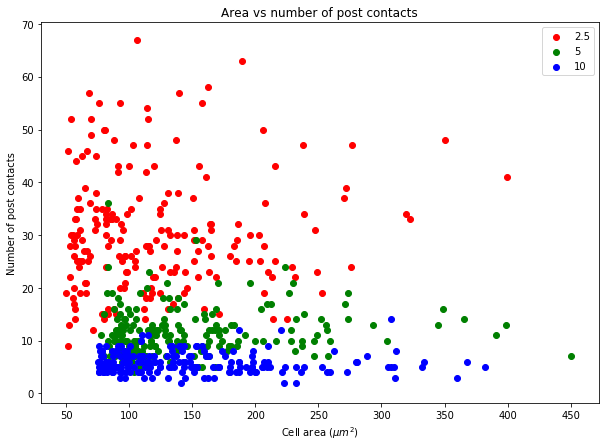

In [9]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.scatter(area2p5, posts2p5, color='r', label='2.5')
plt.scatter(area5, posts5, color='g', label='5')
plt.scatter(area10, posts10, color='b', label='10')

ax.set_xlabel('Cell area ($\mu m^2$)')
ax.set_ylabel('Number of post contacts')
ax.set_title('Area vs number of post contacts')
plt.legend()
     
# show plot
plt.show()

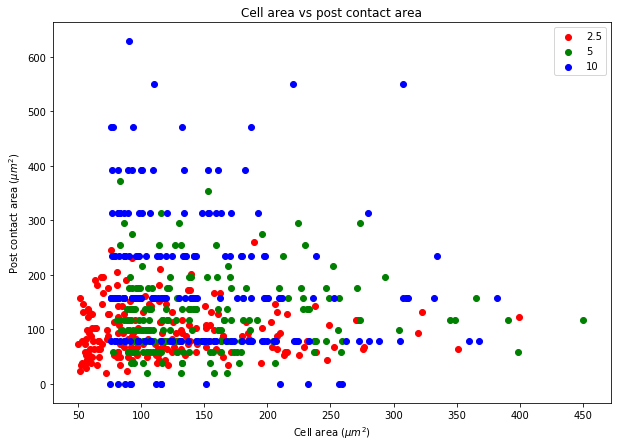

In [10]:
pi = math.pi
postsarea2p5 = dfnew2p5['Number of internal posts 1'] * (pi * 1.25 **2)
postsarea5 = dfnew5['Number of internal posts 1'] * (pi * 2.5 **2)
postsarea10 = dfnew10['Number of internal posts 1'] * (pi * 5 **2)

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.scatter(area2p5, postsarea2p5, color='r', label='2.5')
plt.scatter(area5, postsarea5, color='g', label='5')
plt.scatter(area10, postsarea10, color='b', label='10')

ax.set_xlabel('Cell area ($\mu m^2$)')
ax.set_ylabel('Post contact area ($\mu m^2$)')
ax.set_title('Cell area vs post contact area')
plt.legend()
     
# show plot
plt.show()

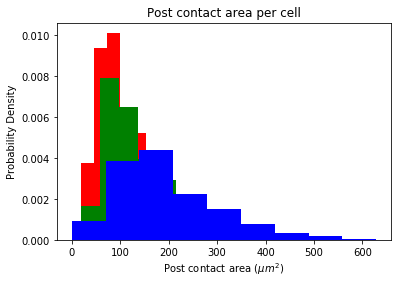

In [11]:
num_bins = 9

fig, ax = plt.subplots()
plt.hist(postsarea2p5, num_bins, density = 1, color='r', label='2.5')
plt.hist(postsarea5, num_bins, density = 1, color='g', label='5')
plt.hist(postsarea10, num_bins, density = 1, color='b', label='10')


plt.xlabel("Post contact area ($\mu m^2$)")
plt.ylabel("Probability Density")
plt.title("Post contact area per cell")
plt.show ()

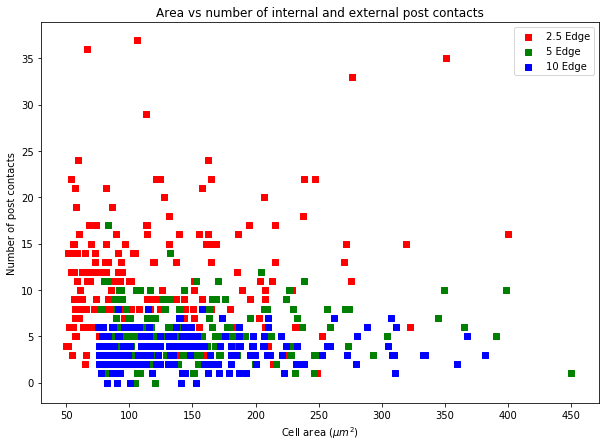

In [12]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.scatter(area2p5, dfnew2p5['Number of edge posts 1'], color='r', marker = ',', label='2.5 Edge')
#plt.scatter(area2p5, dfnew2p5['Number of internal posts 1'], color='r', label='2.5 Internal')
plt.scatter(area5, dfnew5['Number of edge posts 1'], color='g', marker = ',', label='5 Edge')
#plt.scatter(area5, dfnew5['Number of internal posts 1'], color='g', label='5 Internal')
plt.scatter(area10, dfnew10['Number of edge posts 1'], color='b', marker = ',', label='10 Edge')
#plt.scatter(area10, dfnew10['Number of internal posts 1'], color='b', label='10 Internal')


ax.set_xlabel('Cell area ($\mu m^2$)')
ax.set_ylabel('Number of post contacts')
ax.set_title('Area vs number of internal and external post contacts')
plt.legend()
     
# show plot
plt.show()

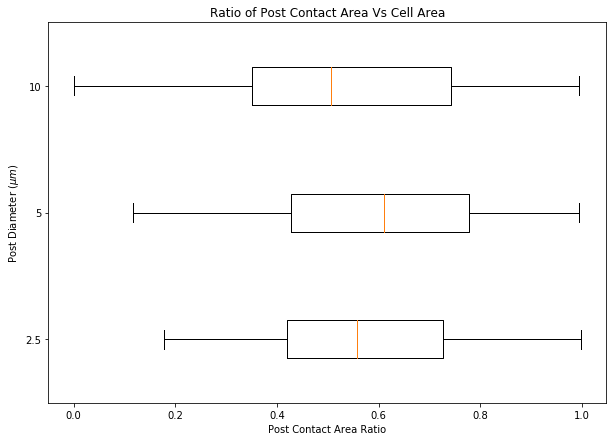

(0.5761981971513905, 0.6015678941833105, 0.500373576765451)

In [15]:
postarearatio2p5 = postsarea2p5 / area2p5
postarearatio5 = postsarea5 / area5
postarearatio10 = postsarea10 / area10

ratio2p5 = np.sort(postarearatio2p5[postarearatio2p5 <= 1])
ratio5 = np.sort(postarearatio5[postarearatio5 <= 1])
ratio10 = np.sort(postarearatio10[postarearatio10 <= 1])

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

postarearatio = [ratio2p5, ratio5, ratio10]

bp = ax.boxplot(postarearatio, vert = 0)

ax.set_xlabel('Post Contact Area Ratio')
ax.set_ylabel('Post Diameter ($\mu m$)')
ax.set_yticklabels(['2.5', '5', '10'])
ax.set_title('Ratio of Post Contact Area Vs Cell Area')

     
# show plot
plt.show()
len(ratio2p5), len(ratio5), len(ratio10)
ratio2p5.mean(), ratio5.mean(), ratio10.mean()

In [ ]:
postareafactor2p5 = (pi*1.25**2)/(5**2)
postareafactor5 = (pi*2.5**2)/(10**2)
postareafactor10 = (pi*5**2)/(20**2)

postareafactor2p5, postareafactor5, postareafactor10

In [ ]:
postsize = ['flat','2.5', '5', '10']
x = np.arange(len(postsize))
y = [areaflat.mean(), area2p5.mean(), area5.mean(), area10.mean()]
errory = [areaflat.std(), area2p5.std(), area5.std(), area10.std()]

fig, ax = plt.subplots(figsize =(10, 7))
ax.bar(x, y, yerr = errory, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Cell Area ($\mu m^2$)')
ax.set_xticks(x)
ax.set_xticklabels(postsize)
ax.set_xlabel('Post Diameter ($\mu m$)')
ax.set_title('Total Cell Area on Micropost Surfaces')


# Save the figure and show
plt.tight_layout()
plt.savefig('Cell Area on Microposts')
plt.show()

In [ ]:
postsize = ['flat', '2.5', '5', '10']
x = np.arange(len(postsize))
y = [areaflat.mean(), area2p5.mean(), area5.mean(), area10.mean()]
errory = [areaflat.std(), area2p5.std(), area5.std(), area10.std()]

fig, ax = plt.subplots()
ax.bar(x, y, yerr = errory, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Cell Area ($\mu m^2$)')
ax.set_xticks(x)
ax.set_xticklabels(postsize)
ax.set_xlabel('Post Diameter ($\mu m$)')
ax.set_title('Total Cell Area on Micropost Surfaces')


# Save the figure and show
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

areas = [areaflat, area2p5, area5, area10]

bp = ax.boxplot(areas, vert = 0)

ax.set_xlabel('Cell Area ($\mu m^2$)')
ax.set_ylabel('Post Diameter ($\mu m$)')
ax.set_yticklabels(['flat', '2.5', '5', '10'])
ax.set_title('Total Cell Area on Micropost Surfaces')

     
# show plot
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

circularitys = [circularityflat, circularity2p5, circularity5, circularity10]

bp = ax.boxplot(circularitys, vert = 0)

ax.set_xlabel('Cell Circularity')
ax.set_ylabel('Post Diameter ($\mu m$)')
ax.set_yticklabels(['flat', '2.5', '5', '10'])
ax.set_title('Circularity of Cells on Micropost Surfaces')

     
# show plot
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

celllengths = [celllengthflat, celllength2p5, celllength5, celllength10]

bp = ax.boxplot(celllengths, vert = 0)

ax.set_xlabel('Cell Length ($\mu m$)')
ax.set_ylabel('Post Diameter ($\mu m$)')
ax.set_yticklabels(['flat', '2.5', '5', '10'])
ax.set_title('Length of Cells on Micropost Surfaces')

     
# show plot
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

aspectratios = [aspectratioflat, aspectratio2p5, aspectratio5, aspectratio10]

bp = ax.boxplot(aspectratios, vert = 0)

ax.set_xlabel('Cell Aspect Ratio (Short Axis/Long Axis)')
ax.set_ylabel('Post Diameter ($\mu m$)')
ax.set_yticklabels(['flat', '2.5', '5', '10'])
ax.set_title('Aspect Ratio of Cells on Micropost Surfaces')

     
# show plot
plt.show()

In [ ]:
def polynomial_regression(X, y, order=1, confidence=95, num=100):
    confidence = 1 - ((1 - (confidence / 100)) / 2)
    y_model = np.polyval(np.polyfit(X, y, order), X)
    residual = y - y_model
    n = X.size                     
    m = 2                          
    dof = n - m  
    t = stats.t.ppf(confidence, dof) 
    std_error = (np.sum(residual**2) / dof)**.5
    X_line = np.linspace(np.min(X), np.max(X), num)
    y_line = np.polyval(np.polyfit(X, y, order), X_line)
    ci = t * std_error * (1/n + (X_line - np.mean(X))**2 / np.sum((X - np.mean(X))**2))**.5
    return X_line, y_line, ci

def corr_coef(X, y):
    N = len(X)
    num = (N * (X*y).sum()) - (X.sum() * y.sum())
    den = np.sqrt((N * (X**2).sum() - X.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [ ]:
X_line, y_line, ci = polynomial_regression(areaflat, celllengthflat, order=1)
R = corr_coef(areaflat, celllengthflat)
m, b = np.polyfit(areaflat, celllengthflat, 1)

plt.scatter(areaflat, celllengthflat, color = 'k')
plt.plot(X_line, y_line, color = 'k')
plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5, color = 'k')
plt.text(x = 55, y = 140, s = '''R$^2$={} 
y = {}x+{}'''.format(round(R**2, 4), round(m, 4), round(b, 4)))
plt.title('Area vs Length of Cells on Flat Surfaces')
plt.xlabel('Area ($\mu m^2$)')
plt.ylabel('Length ($\mu m$)')
plt.show()

In [ ]:
X_line, y_line, ci = polynomial_regression(area2p5, celllength2p5, order=1)
R = corr_coef(area2p5, celllength2p5)
m, b = np.polyfit(area2p5, celllength2p5, 1)

plt.scatter(area2p5, celllength2p5, color = 'r')
plt.plot(X_line, y_line, color = 'r')
plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5, color = 'r')
plt.text(x = 45, y = 120, s = '''R$^2$={} 
y = {}x+{}'''.format(round(R**2, 4), round(m, 4), round(b, 4)))
plt.title('Area vs Length of Cells on 2.5 $\mu m$ Surfaces')
plt.xlabel('Area ($\mu m^2$)')
plt.ylabel('Length ($\mu m$)')
plt.show()

In [ ]:
X_line, y_line, ci = polynomial_regression(area5, celllength5, order=1)
R = corr_coef(area5, celllength5)
m, b = np.polyfit(area5, celllength5, 1)

plt.scatter(area5, celllength5, color = 'g')
plt.plot(X_line, y_line, color = 'g')
plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5,  color = 'g')
plt.text(x = 67, y = 97, s = '''$R^2$={} 
y = {}x+{}'''.format(round(R**2, 4), round(m, 4), round(b, 4)))
plt.title('Area vs Length of Cells on 5 $\mu m$ Surfaces')
plt.xlabel('Area ($\mu m^2$)')
plt.ylabel('Length ($\mu m$)')
plt.show()

In [ ]:
X_line, y_line, ci = polynomial_regression(area10, celllength10, order=1)
R = corr_coef(area10, celllength10)
m, b = np.polyfit(area10, celllength10, 1)

plt.scatter(area10, celllength10, color = 'b')
plt.plot(X_line, y_line, color = 'b')
plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5, color = 'b')
plt.text(x = 67, y = 75, s = '''$R^2$={} 
y = {}x+{}'''.format(round(R**2, 4), round(m, 4), round(b, 4)))
plt.title('Area vs Length of Cells on 10 $\mu m$ Surfaces')
plt.xlabel('Area ($\mu m^2$)')
plt.ylabel('Length ($\mu m$)')
plt.show()

In [ ]:
postratio2p5 = dfnew2p5['Number of internal posts 1'] / dfnew2p5['Number of edge posts 1']
postratio5 = dfnew5['Number of internal posts 1'] / dfnew5['Number of edge posts 1']
postratio10 = dfnew10['Number of internal posts 1'] / dfnew10['Number of edge posts 1']

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

postratio = [postratio2p5, postratio5, postratio10]

bp = ax.boxplot(postratio, vert = 0)

ax.set_xlabel('Number of Internal Posts/Number of Edge Posts')
ax.set_ylabel('Post Diameter ($\mu m$)')
ax.set_yticklabels(['2.5', '5', '10'])
ax.set_title('Ratio of Internal Posts to Edge Posts Per Cell')

     
# show plot
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.scatter(dfnew2p5['Number of internal posts 1'], dfnew2p5['Number of edge posts 1'], color='r', label='2.5')
plt.scatter(dfnew5['Number of internal posts 1'], dfnew5['Number of edge posts 1'], color='g', label='5')
plt.scatter(dfnew10['Number of internal posts 1'], dfnew10['Number of edge posts 1'], color='b', label='10')

ax.set_xlabel('Number of Internal Posts')
ax.set_ylabel('Number of Edge Posts')
ax.set_title('Number of Internal vs Edge Posts Per Cell')
plt.legend()
     
# show plot
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.scatter(celllength2p5, postratio2p5, color='r', label='2.5')
plt.scatter(celllength5, postratio5, color='g', label='5')
plt.scatter(celllength10, postratio10, color='b', label='10')

ax.set_xlabel('Cell Length ($\mu m$)')
ax.set_ylabel('Number of Internal Posts/Number of Edge Posts')
ax.set_title('Ratio of Internal Posts to Edge Posts Per Cell')
plt.legend()
     
# show plot
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.scatter(celllength2p5, dfnew2p5['Number of edge posts 1'], color='r', label='2.5')
plt.scatter(celllength5, dfnew5['Number of edge posts 1'], color='g', label='5')
plt.scatter(celllength10, dfnew10['Number of edge posts 1'], color='b', label='10')

ax.set_xlabel('Cell Length ($\mu m$)')
ax.set_ylabel('Number of Number of Edge Posts')
ax.set_title('Edge Posts Per Cell')
plt.legend()
     
# show plot
plt.show()

In [ ]:
X_line, y_line, ci = polynomial_regression(area2p5, postratio2p5, order=1)
R = corr_coef(area2p5, postratio2p5)
m, b = np.polyfit(area2p5, postratio2p5, 1)
plt.scatter(area2p5, postratio2p5, color='r')
plt.plot(X_line, y_line, color='r')
plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5, color='r')
plt.text(x = 300, y = 19, s = '''$R^2$={} 
y = {}x+{}'''.format(round(R**2, 4), round(m, 4), round(b, 4)))
plt.title('Ratio of Internal Posts to Edge Posts Per Cell (2.5 $\mu m$ Surfaces)')
plt.xlabel('Area ($\mu m^2$)')
plt.ylabel('Number of Internal Posts/Number of Edge Posts')
plt.show()

In [ ]:
X_line, y_line, ci = polynomial_regression(area5, postratio5, order=1)
R = corr_coef(area5, postratio5)
m, b = np.polyfit(area5, postratio5, 1)
plt.scatter(area5, postratio5, color='g')
plt.plot(X_line, y_line, color='g')
plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5, color='g')
plt.text(x = 350, y = 8, s = '''$R^2$={} 
y = {}x+{}'''.format(round(R**2, 4), round(m, 4), round(b, 4)))
plt.title('Ratio of Internal Posts to Edge Posts Per Cell (5 $\mu m$ Surfaces)')
plt.xlabel('Area ($\mu m^2$)')
plt.ylabel('Number of Internal Posts/Number of Edge Posts')
plt.show()

In [ ]:
X_line, y_line, ci = polynomial_regression(area10, postratio10, order=1)
R = corr_coef(area10, postratio10)
m, b = np.polyfit(area10, postratio10, 1)
plt.scatter(area10, postratio10, color='b')
plt.plot(X_line, y_line, color='b')
plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5, color='b')
plt.text(x = 300, y = 5.25, s = '''$R^2$={} 
y = {}x+{}'''.format(round(R**2, 4), round(m, 4), round(b, 4)))
plt.title('Ratio of Internal Posts to Edge Posts Per Cell (10 $\mu m$ Surfaces)')
plt.xlabel('Area ($\mu m^2$)')
plt.ylabel('Number of Internal Posts/Number of Edge Posts')
plt.show()

In [ ]:
dfflatnew.to_csv('/Users/carolinemccue/Desktop/Cell Data/Flat.csv')
dfnew2p5.to_csv('/Users/carolinemccue/Desktop/Cell Data/2p5umPosts.csv')
dfnew5.to_csv('/Users/carolinemccue/Desktop/Cell Data/5umPosts.csv')
dfnew10.to_csv('/Users/carolinemccue/Desktop/Cell Data/10umPosts.csv')